In [33]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [6]:
heart_data=pd.read_csv('/Users/maksimtrebusinin/Downloads/archive-2/heart.csv')

In [3]:
heart_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
heart_data.duplicated().sum()

1

In [10]:
heart_data.drop_duplicates(inplace=True)

In [11]:
heart_data.duplicated().sum()

0

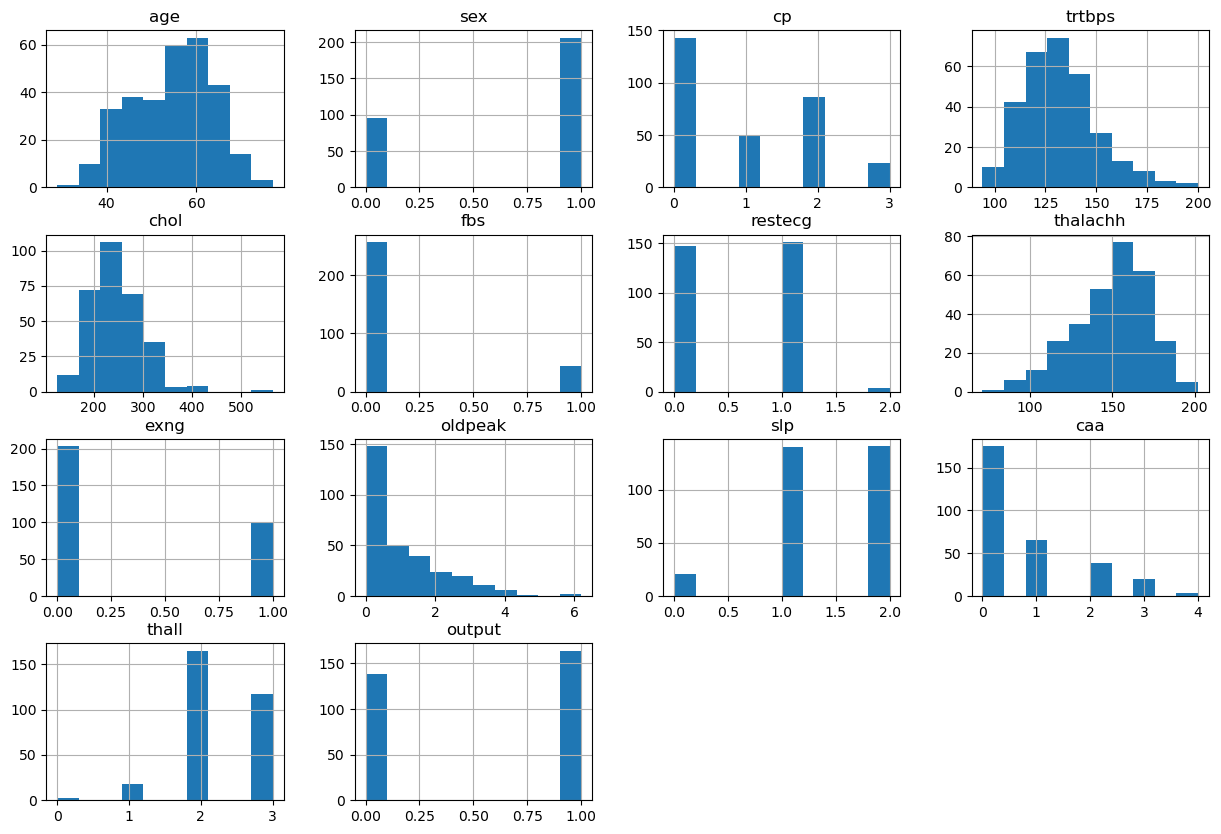

In [12]:
heart_data.hist(figsize=(15,10))
plt.show()

<Axes: >

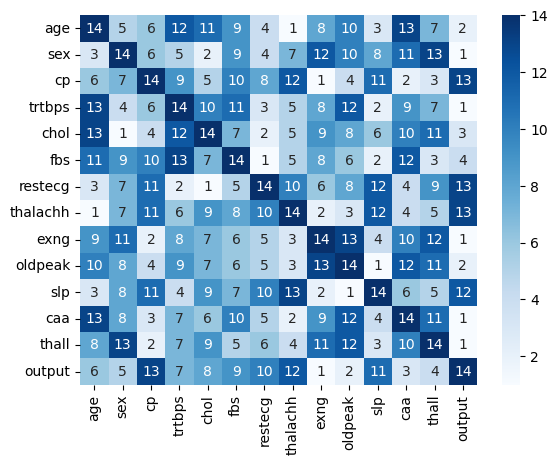

In [16]:
correl=heart_data.corr()
sns.heatmap(correl.rank(axis='columns'),cmap='Blues',annot=True)

In [18]:
X=heart_data.drop('output',axis=1)
y=heart_data['output']

In [19]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=0)

In [27]:
clf_random_forest=RandomForestClassifier()
parametrs_rnf={'n_estimators':range(2,11), 'max_depth': range(2,15), 'min_samples_split': range(2,8)}
grid_search_rnf=GridSearchCV(clf_random_forest, parametrs_rnf, cv=6, n_jobs=-1)
grid_search_rnf.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 15),
                         'min_samples_split': range(2, 8),
                         'n_estimators': range(2, 11)})

In [28]:
grid_search_rnf.best_params_

{'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 6}

In [29]:
best_rnf=grid_search_rnf.best_estimator_
y_pred_rnf=best_rnf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_rnf))
print('Recall:', recall_score(y_test,y_pred_rnf))
print('Precision:', precision_score(y_test,y_pred_rnf))
print('f1:', f1_score(y_test,y_pred_rnf))

Accuracy: 0.8421052631578947
Recall: 0.8837209302325582
Precision: 0.8444444444444444
f1: 0.8636363636363636


# Knn without StandardScaler

In [30]:
clf_kneighbors=KNeighborsClassifier()
parametrs_knn={'n_neighbors': range(3,10), 'metric': ['euclidean', 'manhattan', 'chebyshev']}
grid_search_knn=GridSearchCV(clf_kneighbors, parametrs_knn, cv=6)
grid_search_knn.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': range(3, 10)})

In [31]:
grid_search_knn.best_params_

{'metric': 'chebyshev', 'n_neighbors': 5}

In [32]:
best_knn=grid_search_knn.best_estimator_
y_pred_knn=best_knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Recall:', recall_score(y_test,y_pred_knn))
print('Precision:', precision_score(y_test,y_pred_knn))
print('f1:', f1_score(y_test,y_pred_knn))

Accuracy: 0.5921052631578947
Recall: 0.6976744186046512
Precision: 0.625
f1: 0.6593406593406593


# Knn with StandardScaler

In [37]:
scale=StandardScaler()
scale.fit(heart_data)

StandardScaler()

In [39]:
heart_data_transform=pd.DataFrame(scale.transform(heart_data), columns=heart_data.columns)

In [43]:
heart_data_transform.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [51]:
heart_data_transform

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.949794,0.682656,1.976470,0.764066,-0.261285,2.389793,-1.002541,0.018826,-0.698344,1.084022,-2.271182,-0.714911,-2.147955,0.917313
1,-1.928548,0.682656,1.005911,-0.091401,0.067741,-0.418446,0.901657,1.636979,-0.698344,2.118926,-2.271182,-0.714911,-0.513994,0.917313
2,-1.485726,-1.464866,0.035352,-0.091401,-0.822564,-0.418446,-1.002541,0.980971,-0.698344,0.307844,0.979514,-0.714911,-0.513994,0.917313
3,0.174856,0.682656,0.035352,-0.661712,-0.203222,-0.418446,0.901657,1.243374,-0.698344,-0.209608,0.979514,-0.714911,-0.513994,0.917313
4,0.285561,-1.464866,-0.935208,-0.661712,2.080602,-0.418446,0.901657,0.587366,1.431958,-0.382092,0.979514,-0.714911,-0.513994,0.917313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.285561,-1.464866,-0.935208,0.478910,-0.106449,-0.418446,0.901657,-1.161988,1.431958,-0.727060,-0.645834,-0.714911,1.119967,-1.090140
298,-1.042904,0.682656,1.976470,-1.232023,0.338703,-0.418446,0.901657,-0.768384,-0.698344,0.135360,-0.645834,-0.714911,1.119967,-1.090140
299,1.503322,0.682656,-0.935208,0.707035,-1.035462,2.389793,0.901657,-0.374779,-0.698344,2.032684,-0.645834,1.274980,1.119967,-1.090140
300,0.285561,0.682656,-0.935208,-0.091401,-2.235438,-0.418446,0.901657,-1.511859,1.431958,0.135360,-0.645834,0.280034,1.119967,-1.090140


In [50]:
heart_data_transform.output.unique()

array([ 0.91731315, -1.09014026])

In [54]:
X_tr=heart_data_transform.drop('output',axis=1)

In [56]:
X_train_tr, X_test_tr, y_train_tr, y_test_tr=train_test_split(X_tr,y, test_size=0.25, random_state=0)

In [57]:
clf_kneighbors_st=KNeighborsClassifier()
parametrs_knn_st={'n_neighbors': range(3,10), 'metric': ['euclidean', 'manhattan', 'chebyshev']}
grid_search_knn_st=GridSearchCV(clf_kneighbors_st, parametrs_knn_st, cv=6)
grid_search_knn_st.fit(X_train_tr,y_train_tr)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': range(3, 10)})

In [58]:
grid_search_knn_st.best_params_

{'metric': 'euclidean', 'n_neighbors': 9}

In [59]:
best_knn_st=grid_search_knn_st.best_estimator_
y_pred_knn_st=best_knn_st.predict(X_test_tr)
print('Accuracy:', accuracy_score(y_test_tr, y_pred_knn_st))
print('Recall:', recall_score(y_test_tr, y_pred_knn_st))
print('Precision:', precision_score(y_test_tr, y_pred_knn_st))
print('f1:', f1_score(y_test_tr, y_pred_knn_st))

Accuracy: 0.868421052631579
Recall: 0.9069767441860465
Precision: 0.8666666666666667
f1: 0.8863636363636364


# SVC

In [64]:
svc_clf=SVC()
svc_clf.fit(X_train_tr, y_train)

SVC()

In [67]:
y_pred_svc=svc_clf.predict(X_test_tr)
print('Accuracy:', accuracy_score(y_test_tr, y_pred_svc))
print('Recall:', recall_score(y_test_tr, y_pred_svc))
print('Precision:', precision_score(y_test_tr, y_pred_svc))
print('f1:', f1_score(y_test_tr, y_pred_svc))

Accuracy: 0.881578947368421
Recall: 0.9069767441860465
Precision: 0.8863636363636364
f1: 0.896551724137931
